## Exercise 1

In [11]:
import numpy as np
from keras.models import Sequential
from keras import layers

In [12]:
image = np.array([[1, 5, 8, 4, 9],
                  [8, 9, 3, 2, 7],
                  [4, 5, 2, 1, 8],
                  [1, 0, 0, 1, 5],
                  [0, 0, 0, 0, 0]], np.uint8)
# image = image.astype('float32')/255.0

In [13]:
image = image.reshape(1, 5, 5, 1)

In [14]:
model = Sequential()

#Feature Extraction part
model.add(layers.Conv2D(2, kernel_size=(3,3), padding='same', strides=(1, 1), input_shape=(5, 5, 1)))
model.add(layers.Conv2D(3, kernel_size=(1,1), padding='same', strides=(1, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

In [15]:
output = model.predict(image)

1/1 [==============================] - 0s 128ms/step


In [16]:
output

array([[[[-1.8822384 ,  1.858228  , -5.4505424 ],
         [-1.1048703 ,  1.858228  , -3.3624277 ],
         [-1.1048703 ,  1.4737636 , -3.3624277 ],
         [-0.35761482,  2.720675  , -0.09677386]],

        [[-1.8822384 ,  1.858228  , -5.4505424 ],
         [-1.1048703 ,  1.9798884 , -3.2270164 ],
         [-1.1048703 ,  1.9798884 , -3.2270164 ],
         [-1.6680464 ,  2.0966291 , -4.7799125 ]],

        [[-0.95506096,  1.6354339 , -3.1782136 ],
         [-0.998839  ,  1.9798884 , -3.1782136 ],
         [-1.1401569 ,  1.9798884 , -3.2270164 ],
         [-1.064878  ,  1.7738178 , -3.4289882 ]],

        [[-0.09048179,  0.26532197, -0.35323647],
         [-0.10201436,  0.8657208 , -0.3243326 ],
         [-0.10201436,  0.8657208 , -0.3243326 ],
         [-0.5913048 ,  0.62797856, -1.9748995 ]]]], dtype=float32)

## Exercise 2

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

#Dataaugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Earlystopping
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',strides=(1, 1), input_shape=(32, 32, 3)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',strides=(1, 1)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu',strides=(1, 1)),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [7]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
1407/1407 [==============================] - 274s 194ms/step - loss: 1.3027 - accuracy: 0.5413 - val_loss: 1.0061 - val_accuracy: 0.6530
Epoch 2/5
1407/1407 [==============================] - 271s 192ms/step - loss: 0.8820 - accuracy: 0.6948 - val_loss: 0.8464 - val_accuracy: 0.7116
Epoch 3/5
1407/1407 [==============================] - 271s 193ms/step - loss: 0.7182 - accuracy: 0.7532 - val_loss: 0.8032 - val_accuracy: 0.7306
Epoch 4/5
1407/1407 [==============================] - 269s 191ms/step - loss: 0.6021 - accuracy: 0.7935 - val_loss: 0.7716 - val_accuracy: 0.7442
Epoch 5/5
1407/1407 [==============================] - 276s 196ms/step - loss: 0.4993 - accuracy: 0.8288 - val_loss: 0.7718 - val_accuracy: 0.7488


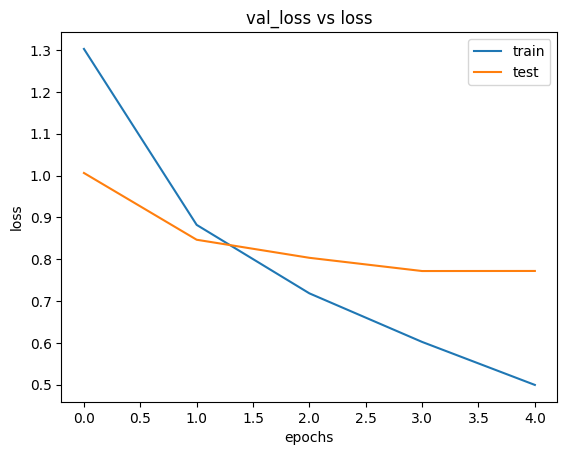

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('val_loss vs loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [8]:
#evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 17s 53ms/step - loss: 0.8051 - accuracy: 0.7376


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

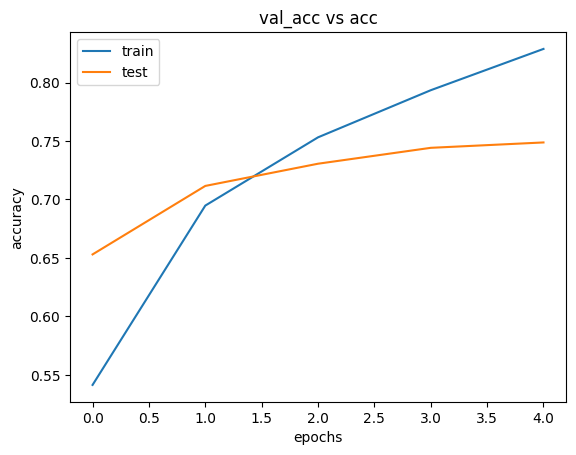

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('val_acc vs acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [17]:
# The accuracy of the model with CNN has increased a lot, and even the accuracy of the model during training, which was 82% using the CNN method with
# five epochs, and 73% during testing, which is much better accuracy than Dense networks. We also achieved a lower loss value with CNN.